<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1 
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew. 

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [3]:
# ANSWER
titanic_csv = '.../../titanic.csv'

In [15]:
titanic = pd.read_csv(titanic_csv, index_col = 'PassengerId')

In [16]:
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [17]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
titanic.tail()

Survived  Pclass                                      Name  \
PassengerId                                                               
887                 0       2                     Montvila, Rev. Juozas   
888                 1       1              Graham, Miss. Margaret Edith   
889                 0       3  Johnston, Miss. Catherine Helen "Carrie"   
890                 1       1                     Behr, Mr. Karl Howell   
891                 0       3                       Dooley, Mr. Patrick   

                Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
PassengerId                                                                
887            male  27.0      0      0      211536  13.00   NaN        S  
888          female  19.0      0      0      112053  30.00   B42        S  
889          female   NaN      1      2  W./C. 6607  23.45   NaN        S  
890            male  26.0      0      0      111369  30.00  C148        C  
891            male  32.0      0      0      370376   7.75   NaN        Q

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary 

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values. 

In [12]:
# ANSWER

In [19]:
titanic.shape

(891, 11)

In [21]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [25]:
#Maybe we can separate the last names - and create a new feature "Family"

titanic[['Family_Name', 'First_Name']]=titanic['Name'].str.split(',', n=1, expand = True)
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

            Family_Name                                   First_Name  
PassengerId                                                           
1                Braund                              Mr. Owen Harris  
2               Cumings   Mrs. John Bradley (Florence Briggs Thayer)  
3             Heikkinen                                  Miss. Laina  
4              Futrelle           Mrs. Jacques Heath (Lily May Peel)  
5                 Allen                            Mr. William Henry

In [27]:
#Master seems to be always kids? Maybe we should create a separate field for this
titanic[['Honorific','Actual_Name']]=titanic['First_Name'].str.split('.', n=1, expand = True)
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833   C85        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000  C123        S   
5                0      0            373450   8.0500   NaN        S   

            Family_Name                                   First_Name  \
PassengerId                                                            
1                Braund                              Mr. Owen Harris   
2               Cumings   Mrs. John Bradley (Florence Briggs Thayer)   
3             Heikkinen                                  Miss. Laina   
4              Futrelle           Mrs. Jacques Heath (Lily May Peel)   
5                 Allen                            Mr. William Henry   

            Honorific                             Actual_Name  
PassengerId                                                    
1                  Mr                             Owen Harris  
2                 Mrs   John Bradley (Florence Briggs Thayer)  
3                Miss                                   Laina  
4                 Mrs           Jacques Heath (Lily May Peel)  
5                  Mr                           William Henry

In [31]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Name', 'Honorific', 'Actual_Name'],
      dtype='object')

In [33]:
titanic['Honorific'] = titanic['Honorific'].str.strip()

In [38]:
titanic[titanic['Honorific'] == 'Master']

Survived  Pclass  \
PassengerId                     
8                   0       3   
17                  0       3   
51                  0       3   
60                  0       3   
64                  0       3   
66                  1       3   
79                  1       2   
126                 1       3   
160                 0       3   
165                 0       3   
166                 1       3   
172                 0       3   
177                 0       3   
183                 0       3   
184                 1       2   
194                 1       2   
262                 1       3   
279                 0       3   
306                 1       1   
341                 1       2   
349                 1       3   
387                 0       3   
408                 1       2   
446                 1       1   
481                 0       3   
490                 1       3   
550                 1       2   
710                 1       3   
752                 1       3   
756                 1       2   
788                 0       3   
789                 1       3   
803                 1       1   
804                 1       3   
820                 0       3   
825                 0       3   
828                 1       2   
832                 1       2   
851                 0       3   
870                 1       3   

                                                          Name   Sex    Age  \
PassengerId                                                                   
8                               Palsson, Master. Gosta Leonard  male   2.00   
17                                        Rice, Master. Eugene  male   2.00   
51                                  Panula, Master. Juha Niilo  male   7.00   
60                          Goodwin, Master. William Frederick  male  11.00   
64                                       Skoog, Master. Harald  male   4.00   
66                                    Moubarek, Master. Gerios  male    NaN   
79                               Caldwell, Master. Alden Gates  male   0.83   
126                               Nicola-Yarred, Master. Elias  male  12.00   
160                                 Sage, Master. Thomas Henry  male    NaN   
165                               Panula, Master. Eino Viljami  male   1.00   
166            Goldsmith, Master. Frank John William "Frankie"  male   9.00   
172                                       Rice, Master. Arthur  male   4.00   
177                              Lefebre, Master. Henry Forbes  male    NaN   
183                      Asplund, Master. Clarence Gustaf Hugo  male   9.00   
184                                  Becker, Master. Richard F  male   1.00   
194                                 Navratil, Master. Michel M  male   3.00   
262                          Asplund, Master. Edvin Rojj Felix  male   3.00   
279                                         Rice, Master. Eric  male   7.00   
306                             Allison, Master. Hudson Trevor  male   0.92   
341                             Navratil, Master. Edmond Roger  male   2.00   
349                     Coutts, Master. William Loch "William"  male   3.00   
387                            Goodwin, Master. Sidney Leonard  male   1.00   
408                             Richards, Master. William Rowe  male   3.00   
446                                  Dodge, Master. Washington  male   4.00   
481                             Goodwin, Master. Harold Victor  male   9.00   
490                      Coutts, Master. Eden Leslie "Neville"  male   9.00   
550                             Davies, Master. John Morgan Jr  male   8.00   
710          Moubarek, Master. Halim Gonios ("William George")  male    NaN   
752                                        Moor, Master. Meier  male   6.00   
756                                  Hamalainen, Master. Viljo  male   0.67   
788                                  Rice, Master. George Hugh  male   8.00   
789                

In [40]:
titanic.groupby(['Honorific']).Age.median()

Honorific
Capt            70.0
Col             58.0
Don             40.0
Dr              46.5
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           3.5
Miss            21.0
Mlle            24.0
Mme             24.0
Mr              30.0
Mrs             35.0
Ms              28.0
Rev             46.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [42]:
titanic.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Name      0
Honorific        0
Actual_Name      0
dtype: int64

In [44]:
titanic.groupby(by= ['Pclass', 'Sex', 'Embarked', 'Honorific'])['Age'].transform('median')

PassengerId
1      26.0
2      44.0
3      19.0
4      39.0
5      26.0
       ... 
887    42.0
888    23.0
889    19.0
890    36.0
891    31.5
Name: Age, Length: 891, dtype: float64

In [46]:
titanic['Age'].fillna(titanic.groupby(by= ['Pclass', 'Sex', 'Embarked', 'Honorific'])['Age'].transform('median'), inplace = True)

In [48]:
titanic.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Name      0
Honorific        0
Actual_Name      0
dtype: int64

In [50]:
titanic['Cabin'] = titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  \
PassengerId                                                           
1                1      0         A/5 21171   7.2500   NaN        S   
2                1      0          PC 17599  71.2833     C        C   
3                0      0  STON/O2. 3101282   7.9250   NaN        S   
4                1      0            113803  53.1000     C        S   
5                0      0            373450   8.0500   NaN        S   

            Family_Name Honorific                             Actual_Name  
PassengerId                                                                
1                Braund        Mr                             Owen Harris  
2               Cumings       Mrs   John Bradley (Florence Briggs Thayer)  
3             Heikkinen      Miss                                   Laina  
4              Futrelle       Mrs           Jacques Heath (Lily May Peel)  
5                 Allen        Mr                           William Henry

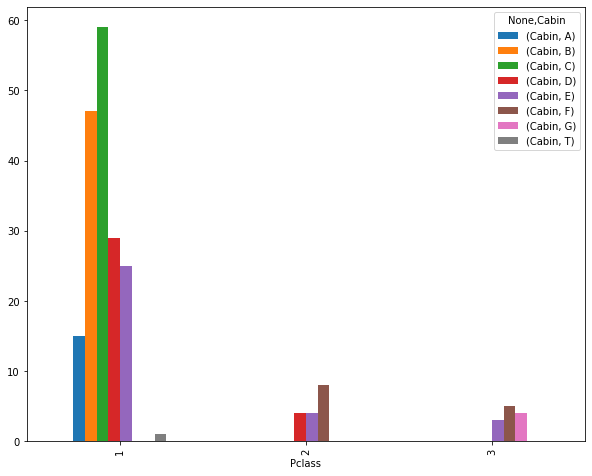

In [52]:
titanic.groupby(by=['Pclass', 'Cabin']).agg({'Cabin': 'count'}).unstack().plot(kind='bar', figsize=(10,8));

In [54]:
cabin_map = {
    'A': 1
    , 'B': 2
    , 'C': 3
    , 'D': 4
    , 'E': 5
    , 'F': 6
    , 'G': 7
    , 'T': 8
}
titanic['Cabin'] = titanic['Cabin'].map(cabin_map)

In [56]:
# Fill Cabin with Mean values
titanic['Cabin'].fillna(titanic.groupby(by=['Pclass'])['Cabin'].transform("mean"), inplace=True) 

In [58]:
# Remove Decimal Numbers
titanic['Cabin'] = np.round(titanic['Cabin'], decimals=0)

In [60]:
# ANSWER
titanic[titanic['Embarked'].isna()]
# Only 2 people had Embarked  with NA

Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare  Cabin Embarked  \
PassengerId                                                             
62           female  38.0      0      0  113572  80.0    NaN      NaN   
830          female  62.0      0      0  113572  80.0    NaN      NaN   

            Family_Name Honorific                     Actual_Name  
PassengerId                                                        
62                Icard      Miss                          Amelie  
830               Stone       Mrs   George Nelson (Martha Evelyn)

In [62]:
# Majority is from S, we can assign this to 
titanic['Embarked'] = titanic['Embarked'].apply(lambda x: x if type(x) is str else 'S')

### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [86]:
# ANSWER
features = ['Pclass', 'Parch']
X = titanic[features]
y = titanic['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [67]:
# ANSWER
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [71]:
# ANSWER
# Create Model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [73]:
# ANSWER
# Fit Model
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [75]:
# ANSWER
logreg.coef_

array([[-0.87239066,  0.337888  ]])

The computed intercept (`intercept_`) is the 1st element of another array:

In [76]:
# ANSWER
logreg.intercept_

array([1.30430282])

We can create tuples of the predictor names and coefficients like this:

In [80]:
# ANSWER
print(set(zip(features, logreg.coef_[0])))

{('Parch', 0.33788800487797466), ('Pclass', -0.8723906606017792)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [82]:
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names

Pclass      -0.872391
Parch       +0.337888


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [84]:
# ANSWER
print('accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

accuracy =  0.6901


What is the  `accuracy_score` for the test data?

In [85]:
# ANSWER
print('accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))

accuracy =  0.6682


What can we say aout this result?

ANSWER
There is only 3% difference between train score and test score so overfitting is unlikely


#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [89]:
# ANSWER
# Build Model
features = ['Pclass', 'Parch','Age']
X = titanic[features]
y = titanic['Survived']
# Fit Model
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
# Score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(set(zip(features, logreg.coef_[0])))
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1])) 
  
print('training accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))
print('test accuracy = {:7.4f}'.format(logreg.score(X_test, y_test)))


{('Pclass', -1.205081249171439), ('Age', -0.04338001639452156), ('Parch', 0.22867194004743654)}
Pclass      -1.205081
Parch       +0.228672
Age         -0.043380
training accuracy =  0.7111
test accuracy =  0.6637


So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

- Age is not a good indicator of wether a person has survived or died in titanic



Let's see where the model is going wrong by showing the Confusion Matrix:

In [93]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[104  24]
 [ 51  44]]


Nb. Here is how `confusion_matrix` arranges its output:

In [94]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [96]:
preds = logreg.predict_proba(X_test)[:,1]

In [98]:
preds

array([0.52265818, 0.20341149, 0.55734509, 0.26119685, 0.75427392,
       0.2408167 , 0.46053915, 0.6580542 , 0.72278034, 0.26119685,
       0.21053106, 0.20341149, 0.457705  , 0.40686849, 0.26119685,
       0.72278034, 0.44678156, 0.21783169, 0.14198411, 0.64856781,
       0.16446322, 0.20341149, 0.75617374, 0.54661773, 0.29603788,
       0.19647276, 0.84803854, 0.29857218, 0.46007865, 0.77181273,
       0.23297518, 0.58685398, 0.31309533, 0.21053106, 0.11982193,
       0.50080423, 0.64822704, 0.20341149, 0.74808695, 0.24883652,
       0.19647276, 0.27865493, 0.58970519, 0.54962233, 0.79928286,
       0.14735138, 0.43608578, 0.32652018, 0.6580542 , 0.56801921,
       0.41737805, 0.51421468, 0.53584691, 0.35575743, 0.18313544,
       0.21783169, 0.4279632 , 0.3838484 , 0.31309533, 0.24883652,
       0.35340549, 0.20341149, 0.49547159, 0.55498544, 0.73138781,
       0.26155472, 0.29397514, 0.20341149, 0.47618928, 0.33876237,
       0.21783169, 0.35072016, 0.54424767, 0.20341149, 0.18170

In [99]:
y_test

PassengerId
863    1
224    0
85     1
681    0
536    1
      ..
507    1
468    0
741    1
355    0
450    1
Name: Survived, Length: 223, dtype: int64

Which type of error is more prevalent?

ANSWER: ...

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

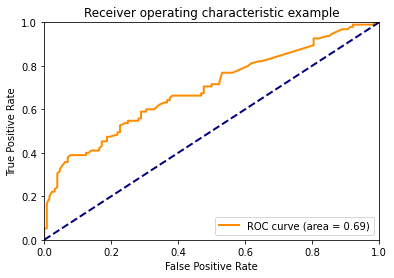

In [101]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [104]:
_

array([1.88318666, 0.88318666, 0.86406125, 0.84651529, 0.82430327,
       0.74808695, 0.73138781, 0.72278034, 0.7140049 , 0.70506503,
       0.6959647 , 0.68923536, 0.68670834, 0.6580542 , 0.64822704,
       0.62819825, 0.58970519, 0.58685398, 0.56801921, 0.55734509,
       0.55498544, 0.54962233, 0.54661773, 0.5440696 , 0.53877348,
       0.53639718, 0.53584691, 0.52852862, 0.52265818, 0.51421468,
       0.5118265 , 0.51164713, 0.49841444, 0.49547159, 0.49252906,
       0.49013998, 0.48996058, 0.47930552, 0.47618928, 0.47087151,
       0.4684905 , 0.457705  , 0.44932309, 0.44678156, 0.44387379,
       0.43861471, 0.43608578, 0.4309577 , 0.4279632 , 0.42257416,
       0.41505536, 0.40686849, 0.40155861, 0.39644349, 0.3838484 ,
       0.37588153, 0.35575743, 0.32652018, 0.31309533, 0.31229854,
       0.29857218, 0.29603788, 0.29397514, 0.29153778, 0.2826596 ,
       0.27865493, 0.27394724, 0.26540406, 0.26155472, 0.26119685,
       0.25703299, 0.24883652, 0.24705403, 0.2408167 , 0.23297

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [105]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'], 
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

Survived                                               Name  \
PassengerId                                                                
1                   0                            Braund, Mr. Owen Harris   
2                   1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3                   1                             Heikkinen, Miss. Laina   
4                   1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5                   0                           Allen, Mr. William Henry   

              Age  SibSp  Parch            Ticket     Fare  Cabin Family_Name  \
PassengerId                                                                     
1            22.0      1      0         A/5 21171   7.2500    NaN      Braund   
2            38.0      1      0          PC 17599  71.2833    NaN     Cumings   
3            26.0      0      0  STON/O2. 3101282   7.9250    NaN   Heikkinen   
4            35.0      1      0            113803  53.1000    NaN    Futrelle   
5            35.0      0      0            373450   8.0500    NaN       Allen   

            Honorific                             Actual_Name  Sex_female  \
PassengerId                                                                 
1                  Mr                             Owen Harris           0   
2                 Mrs   John Bradley (Florence Briggs Thayer)           1   
3                Miss                                   Laina           1   
4                 Mrs           Jacques Heath (Lily May Peel)           1   
5                  Mr                           William Henry           0   

             Sex_male  Embarked_C  Embarked_Q  Embarked_S  Pclass_1  Pclass_2  \
PassengerId                                                                     
1                   1           0           0           1         0         0   
2                   0           1           0           0         1         0   
3                   0           0           0           1         0         0   
4                   0           0           0           1         1         0   
5                   1           0           0           1         0         0   

             Pclass_3  
PassengerId            
1                   1  
2                   0  
3                   1  
4                   0  
5                   1

So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first vriable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [106]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [126]:
# ANSWER
# Set Feature Both Numerical, Categorical
feature= ['Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Age', 'SibSp']
target = 'Survived'
X = titanic_with_dummies[feature]
y = titanic_with_dummies[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Score
logreg_score = logreg.score(X_test, y_test)

In [127]:
logreg_score

0.6636771300448431

Plot the ROC curve for the new model:

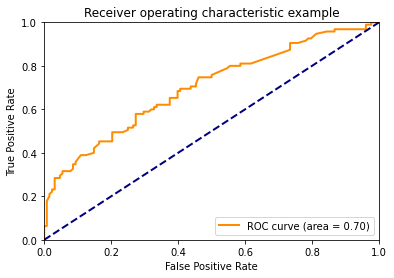

In [128]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

Can we improve the model by including the remaining features?

In [144]:
# ANSWER
# ANSWER
# Set Feature Both Numerical, Categorical
feature= ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
target = 'Survived'
X = titanic_with_dummies[feature]
y = titanic_with_dummies[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Build Model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit
logreg.fit(X_train, y_train)

# Score
logreg_score = logreg.score(X_test, y_test)

In [145]:
print(logreg_score)

0.7713004484304933


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

1. The results Changed

In [151]:
from sklearn.model_selection import cross_val_score
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(logreg, titanic_with_dummies[feature_cols], titanic_with_dummies[target_col], cv=5)
scores.mean()

0.7946393823363255

In [149]:
scores

array([0.77094972, 0.80898876, 0.79213483, 0.7752809 , 0.8258427 ])



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



